# Neuronal Network on MNIST data
Building a native numpy-based 3-layer neural network with backpropagation. The NN will be trained on the MNIST data.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import special
import random
%matplotlib inline

### 1. Data Preparation

In [103]:
# Load data
df = pd.read_csv("mnist_data.csv")
df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Split Label and Features
y = pd.DataFrame(df["7"])
X = df.drop("7", axis=1)

# Convert data to image_data
X_list_28 = []

for i in range(0,len(X)):
    img = np.array(X.loc[i]).reshape((28,28))
    X_list_28.append(img)

len(X_list_28)

9999

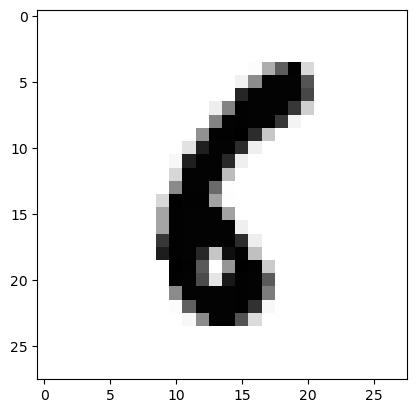

In [46]:
# Show random image of drawn number

rnd = random.randint(0,len(X_list_28))

plt.imshow(X_list_28[rnd], cmap="Greys")

In [107]:
# Scaling, Encoding and Splitting test/train

minmax = MinMaxScaler(feature_range=(0.01, 1))
X_scaled = minmax.fit_transform(X)
y_enc = pd.get_dummies(y, columns=["7"], dtype=int).values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [109]:
print(y_train)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


### 2. Manual Neural Network

In [119]:
# Neuron layers
input_neurons = 784
hidden_neurons = 100
output_neurons = 10

# Create weights
np.random.seed(42)
W_1 = np.random.uniform(-0.5, 0.5, (hidden_neurons,input_neurons))
W_2 = np.random.uniform(-0.5, 0.5, (output_neurons,hidden_neurons))

# Forward propagation only function for predicting
def test_neuronal_network(X, w1, w2):
    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T

    X_1 = np.dot(w1,input_vector)
    O_1 = special.expit(X_1)

    X_2 = np.dot(w2,O_1)
    O_2 = special.expit(X_2)

    return O_1, O_2

# Sample results for test dataset
O_1, O_2 = test_neuronal_network(X_train, W_1, W_2)
y_p = O_2.T
print(np.argmax(y_p[2]))
print(y_test[2])

9
[0 0 0 0 0 0 0 0 0 1]


In [121]:
# Debug array shapes

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"W_1: {W_1.shape}")
print(f"W_2: {W_2.shape}")
print(f"O_1: {O_1.shape}")
print(f"O_2: {O_2.shape}")

X_train: (7999, 784)
y_train: (7999, 10)
W_1: (100, 784)
W_2: (10, 100)
O_1: (100, 7999)
O_2: (10, 7999)


In [123]:
# Extended neuronal network with back propagation

learning_rate = 0.001

def train_neuronal_network(X, w1, w2, y, alpha):

    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T
    
    X_1 = np.dot(w1,input_vector)
    O_1 = special.expit(X_1)

    X_2 = np.dot(w2,O_1)
    O_2 = special.expit(X_2)

    error_output = targets - O_2
    error_hidden = np.dot(w2.T, error_output)

    a_1 = np.dot((error_hidden * O_1*(1-O_1)),np.transpose(input_vector))
    a_2 = np.dot((error_output * O_2*(1-O_2)),np.transpose(O_1))

    w1 = w1 + alpha * a_1
    w2 = w2 + alpha * a_2
    return w1, w2 #, a_1, a_2

w_1_new, w_2_new = train_neuronal_network(X_train, W_1, W_2, y_train, learning_rate)

print(f" W_2: {W_2[0]}")
print(f" W_2_new: {w_2_new[0]}")

 W_2: [ 0.08669483 -0.38676891 -0.19776668  0.23959365 -0.31609335 -0.37154863
 -0.20072449  0.35896168  0.2629435   0.27680158 -0.17754248 -0.40106094
 -0.46804725  0.08619842  0.20228559 -0.12210886  0.02886177 -0.22099613
 -0.13569778  0.22981614  0.21822022 -0.47190829  0.44423157 -0.23098808
  0.4075865   0.01189683 -0.00081798 -0.04938684  0.42242739 -0.29189202
  0.11164517 -0.18221839  0.41523862 -0.33065946  0.17618977 -0.07824156
  0.16122287 -0.34239248 -0.10634091 -0.39273748  0.46877698 -0.2860076
  0.49322613 -0.08150184 -0.42845087 -0.48242482  0.09895637  0.11472966
  0.02479316 -0.43360082 -0.16849563 -0.14092919  0.20481673 -0.08114527
  0.07296711 -0.21366966  0.22598174 -0.45323409  0.48850426  0.14149259
 -0.35113882  0.21749082  0.28655717  0.28859599 -0.22926784  0.45863771
 -0.48226212 -0.12016055 -0.39578183 -0.11514059 -0.442775    0.14497973
 -0.43753884  0.11584679 -0.26591574 -0.32085212 -0.15299914  0.14096103
  0.07820049  0.1804716   0.41898098 -0.296696

In [125]:
# Train 1000 additional epochs

for i in range(1000):
    w_1_new, w_2_new = train_neuronal_network(X_train, w_1_new, w_2_new, y_train, learning_rate)
    if i == 999:
        print("Training over!")

Training over!


### NN Predictions

In [128]:
# Test Neuronal Network after Training
index= 950

O_1, O_2 = test_neuronal_network(X_test, w_1_new, w_2_new)
y_predict = O_2.T
print(np.argmax(y_predict[index]))
print(np.argmax(y_test[index]))
print(y_predict[index])

2
2
[6.52770714e-02 9.09619082e-04 9.47406092e-01 1.42604650e-02
 7.92520036e-05 5.23668936e-04 2.60586273e-03 3.09250288e-03
 7.85511022e-05 7.00114018e-04]


In [130]:
# Performance Calculation

def performance_neuronal_network(y_test, y_predict):
    correct = []
    for i in range(0, len(y_test)):
        if np.argmax(y_predict[i]) == np.argmax(y_test[i]):
            correct.append(i)
    performance = len(correct)/len(y_test)
    return performance, correct

perf, perf_list = performance_neuronal_network(y_test, y_predict)

print(f"Performance: {perf*100}%")

Performance: 93.05%
